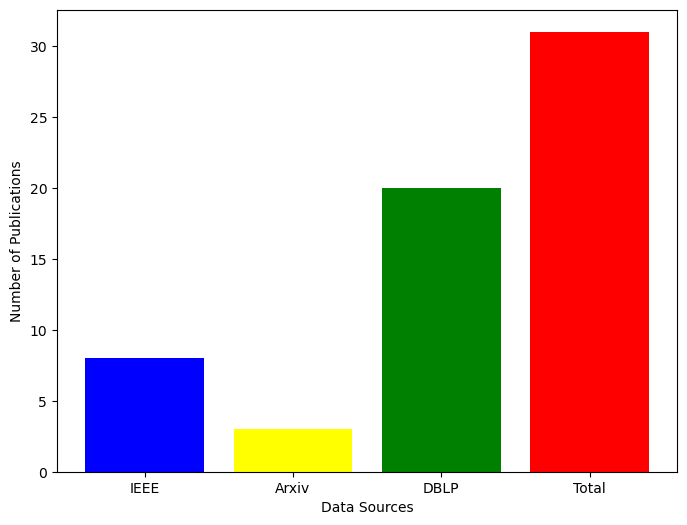

In [5]:
import matplotlib.pyplot as plt

# Number of publications obtained from each source
ieee_publications = 8
arxiv_publications = 3
dblp_publications = 20
total_publications = ieee_publications + arxiv_publications + dblp_publications

# Names of the sources
sources = ['IEEE', 'Arxiv', 'DBLP', 'Total']

# Number of publications for each source
publications = [ieee_publications, arxiv_publications, dblp_publications, total_publications]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(sources, publications, color=['blue', 'yellow', 'green', 'red'])

# Add labels and title
plt.xlabel('Data Sources')
plt.ylabel('Number of Publications')

# Display the plot
plt.show()


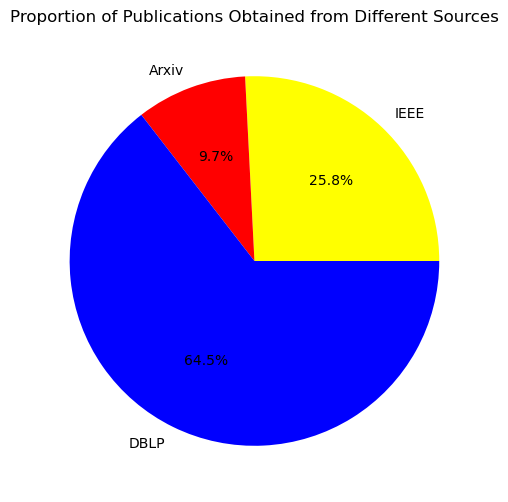

In [22]:
import matplotlib.pyplot as plt

# Number of publications obtained from each source
ieee_publications = 8
arxiv_publications = 3
dblp_publications = 20

# Calculate total publications
total_publications = ieee_publications + arxiv_publications + dblp_publications

# Names of the sources
sources = ['IEEE', 'Arxiv', 'DBLP']

# Number of publications for each source
publications = [ieee_publications, arxiv_publications, dblp_publications]

# Calculate the percentage of publications for each source
percentages = [(count / total_publications) * 100 for count in publications]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=sources, autopct='%1.1f%%', colors=['Yellow', 'Red', 'Blue'])

# Add title
plt.title('Proportion of Publications Obtained from Different Sources')

# Display the plot
plt.show()


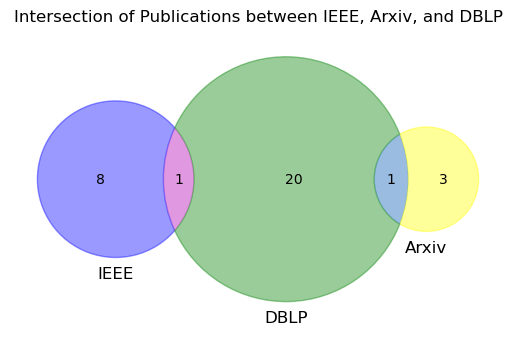

In [4]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3

# Define the number of publications for each source
ieee_publications = 8
arxiv_publications = 3
dblp_publications = 20

# Define the number of publications that overlap between sources
overlap_ieee_arxiv = 0  # No overlap between IEEE and Arxiv
overlap_ieee_dblp = 1
overlap_arxiv_dblp = 1

circle_colors = {'100': 'blue',    # Blue
                 '010': 'yellow',   # Green
                 '001': 'green'}  # Yellow

# Create a Venn diagram
venn_diagram = venn3(subsets=(ieee_publications, arxiv_publications, overlap_ieee_arxiv,
                               dblp_publications, overlap_ieee_dblp, overlap_arxiv_dblp,
                               overlap_ieee_arxiv, overlap_arxiv_dblp, overlap_ieee_dblp),
                     set_labels=('IEEE', 'Arxiv', 'DBLP'))

# Set colors for circles
for subset in circle_colors:
    venn_diagram.get_patch_by_id(subset).set_color(circle_colors[subset])

# Add title
plt.title('Intersection of Publications between IEEE, Arxiv, and DBLP')

# Display the plot
plt.show()


In [32]:
from rdflib import Graph
import pandas as pd
from pyvis.network import Network

# Load RDF data from .nt file
g = Graph()
g.parse("scientificPublicationsArxiv.nt", format="nt")

# Define a SPARQL query to retrieve relevant data
query = """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX arxiv: <http://www.arxivLOD.org/2024/01/scientific/data#>

    SELECT DISTINCT ?title ?authorName ?authorAffiliation ?link ?doi
    WHERE {
        ?publication rdf:type arxiv:Publication .
        ?publication arxiv:title ?title .
        OPTIONAL { ?publication arxiv:summary ?abstract . }
        OPTIONAL { ?publication arxiv:doi ?doi . }
        ?publication arxiv:author ?author .
        ?author rdf:type arxiv:Author .
        ?author arxiv:name ?authorName .
        OPTIONAL {?author arxiv:affiliation ?authorAffiliation . }
        ?publication arxiv:id ?link .
        FILTER 
            ((REGEX(?title, "Linked open data", "i") && (REGEX(?title, "Enrichment", "i") || REGEX(?title, "Enrich", "i"))) ||
            (REGEX(?abstract, "Linked open data", "i") && (REGEX(?abstract, "Enrichment", "i") || REGEX(?abstract, "Enrich", "i")))
        )
    }
"""

# Execute the SPARQL query
results = g.query(query)

# Convert query results to pandas DataFrame
df = pd.DataFrame(results.bindings)

# Clean up DataFrame
df = df.rename(columns=lambda x: x.split(".")[-1])  # Remove namespace prefixes
df = df.applymap(lambda x: x["value"] if isinstance(x, dict) else x)  # Extract 'value' from dictionary values

# Create a PyVis Network instance
net = Network(height="100%", width="100%", notebook=True)

# Add nodes and edges to the network
for index, row in df.iterrows():
    net.add_node(row['title'], label=row['title'], title=row['title'])
    net.add_node(row['authorName'], label=row['authorName'], title=row['authorName'])
    net.add_edge(row['title'], row['authorName'])

# Show the network
net.show("rdf_network.html")


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
